<a href="https://colab.research.google.com/github/YagmurTaze/FaceMaskDetection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [4]:
data_with_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/with_mask'
data_without_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/without_mask'

In [5]:
data_with_mask= os.listdir(data_with_mask_dir)[:3]
data_without_mask= os.listdir(data_without_mask_dir)[:2]

Text(0.5, 1.0, 'Image with Mask')

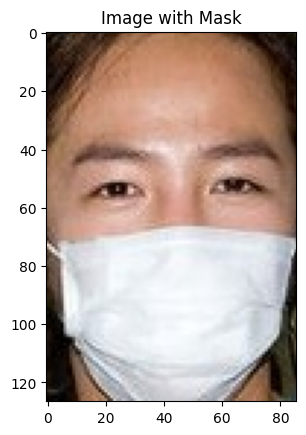

In [6]:
img_path = os.path.join(data_with_mask_dir, data_with_mask[2])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image with Mask')

Text(0.5, 1.0, 'Image without Mask')

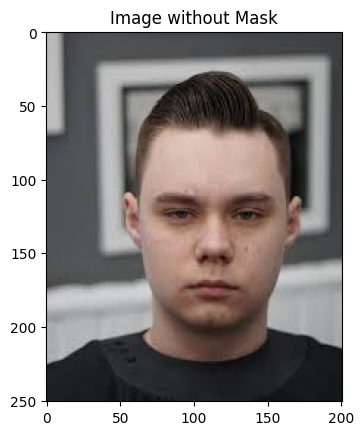

In [7]:
img_path = os.path.join(data_without_mask_dir, data_without_mask[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image without Mask')

## Preprocessing the Dataset

In [8]:
data_with_mask= os.listdir(data_with_mask_dir)
data_without_mask= os.listdir(data_without_mask_dir)

In [9]:
print('Number of without mask images:', len(data_without_mask))
print('Number of with mask images:', len(data_with_mask))

Number of without mask images: 3828
Number of with mask images: 3755


In [10]:
with_mask_labels = [1]*len(data_with_mask)
without_mask_labels = [0]*len(data_without_mask)

Labels = with_mask_labels + without_mask_labels

In [11]:
images = []
def load_images_from_folder(folder):

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder(data_with_mask_dir)
without_mask_images = load_images_from_folder(data_without_mask_dir)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
print(len(images),"images.")
print(images[0].shape, " is the shape of each image.")

7583 images.
(128, 128, 3)  is the shape of each image.


In [13]:
X = np.array(images)
Y = np.array(Labels)

In [14]:
print(X.shape)
print(Y.shape)

(7583, 128, 128, 3)
(7583,)


## Train - Test Splitting

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (6066, 128, 128, 3)
Shape of Y_train is: (6066,)

Shape of X_test is: (1517, 128, 128, 3)
Shape of Y_test is: (1517,)


In [17]:
X_train = X_train/255
X_test = X_test/255

## Model

In [18]:
image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
     input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation ='relu'),
    Dropout(rate=0.2),

    Dense(2, activation ='sigmoid')

])

234545216/234545216 [==============================] - 1s 0us/step


In [19]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 batch_normalization (Batch  (None, 32768)             131072    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

## Training

In [21]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
171/171 [==============================] - 147s 338ms/step - loss: 0.2226 - accuracy: 0.9086 - val_loss: 0.0621 - val_accuracy: 0.9753
Epoch 2/10
171/171 [==============================] - 52s 306ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0673 - val_accuracy: 0.9736
Epoch 3/10
171/171 [==============================] - 52s 304ms/step - loss: 0.0514 - accuracy: 0.9817 - val_loss: 0.0868 - val_accuracy: 0.9720
Epoch 4/10
171/171 [==============================] - 51s 300ms/step - loss: 0.0356 - accuracy: 0.9908 - val_loss: 0.0351 - val_accuracy: 0.9868
Epoch 5/10
171/171 [==============================] - 52s 306ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 6/10
171/171 [==============================] - 51s 299ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0576 - val_accuracy: 0.9819
Epoch 7/10
171/171 [==============================] - 51s 298ms/step - loss: 0.0315 - accuracy: 0.9919 - val_loss: 0.0832 - val_a

In [44]:
model.save('model_faceMask.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 5s 106ms/step - loss: 0.0375 - accuracy: 0.9868
Test Accuracy = 0.9868161082267761


In [23]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 [==============================] - 6s 81ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       747
           1       0.99      0.98      0.99       770

    accuracy                           0.99      1517
   macro avg       0.99      0.99      0.99      1517
weighted avg       0.99      0.99      0.99      1517



## Predict

In [39]:
def predict(img_path):

  img = cv2.imread(img_path)

  plt.imshow(img)
  plt.show()

  input_image_resized = cv2.resize(img, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  if input_pred_label == 1:

    print('The person in the image IS WEARING a mask')

  else:

    print('The person in the image IS NOT WEARING a mask')

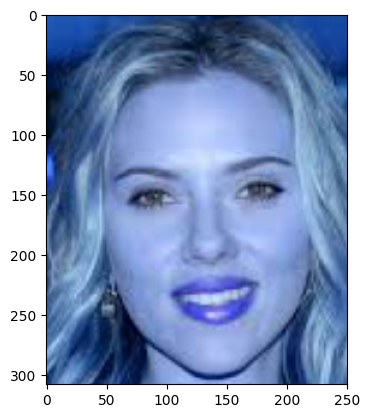

1/1 [==============================] - 0s 32ms/step
[[0.89892554 0.02025275]]
0
The person in the image IS NOT WEARING a mask


In [40]:
predict("/content/scarletjohansson.png")

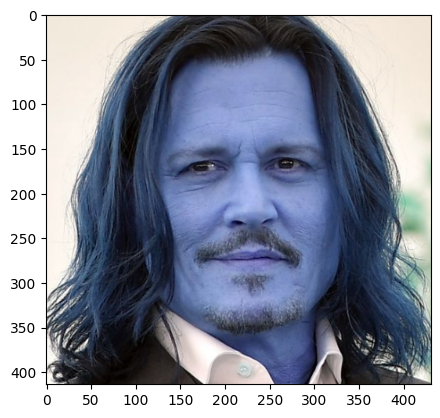

1/1 [==============================] - 0s 56ms/step
[[0.8063327  0.05311519]]
0
The person in the image IS NOT WEARING a mask


In [41]:
predict("/content/jhonnydepp.png")

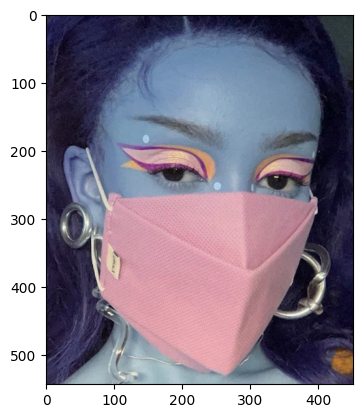

1/1 [==============================] - 0s 57ms/step
[[0.08661006 0.98995835]]
1
The person in the image IS WEARING a mask


In [42]:
predict("/content/dojacat.png")

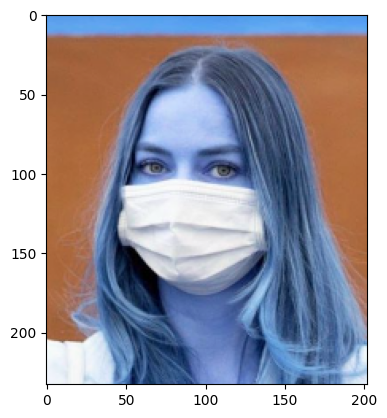

1/1 [==============================] - 0s 63ms/step
[[0.09148801 0.9517483 ]]
1
The person in the image IS WEARING a mask


In [43]:
predict("/content/margotrobbie.png")